# PyTorch Computer Vision

## 0. Computer vision

* [`torchvision`] (https://www.learnpytorch.io/03_pytorch_computer_vision/) - base domain library for PyTorch computer vision
* `torchvision.datasets` - get datasets and data loading functions for your computer
* `torchvision.models` - get pretrained computer vision models that you can leverage for you own problems
* `torchvision.transforms` - functions for manipulating your vision data (images) to be suitable for use with an ML model
* `torch.utils.data.Dataset` - Base dataset class for PyTorch
* `torch.utils.data.DataLoaders` - Creates a Python iterable over a dataset

In [1]:
# Import PyTorch
import torch
from torch import nn

# Import torchvision
import torchvision 
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor

# Import matplotlib 
import matplotlib.pyplot as plt

# Check version
print(torch.__version__)
print(torchvision.__version__)

2.7.1+cu118
0.22.1+cu118


### 1. Getting a dataset

The dataset we'll be using is FashionMNIST from torchvision.datasets

In [2]:
# Setup training data

train_data = datasets.FashionMNIST(
    root='data', # where to download data to
    train=True, # do we want the training dataset?
    download=True, # do we want to download yes/no?
    transform=ToTensor(), # how do we want to transform the data?
    target_transform=None # how do we want to transform the labels/targets?
)

test_data = datasets.FashionMNIST(
    root='data',
    train=False,
    download=True,
    transform=torchvision.transforms.ToTensor(),
    target_transform=None
)

In [3]:
len(train_data), len(test_data)

(60000, 10000)

In [4]:
# See the first training example
image, label = train_data[0]
image, label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [5]:
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [6]:
class_to_idx = train_data.class_to_idx
class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [7]:
train_data.targets

tensor([9, 0, 0,  ..., 3, 0, 5])

In [8]:
# Check the shape of out image
image.shape, label
print(f"Image shape: {image.shape} -> [color_channels, height, width]")
print(f"Image label: {class_names[label]}")

Image shape: torch.Size([1, 28, 28]) -> [color_channels, height, width]
Image label: Ankle boot


### 1.2 Visualizing our data

Image shape: torch.Size([1, 28, 28])


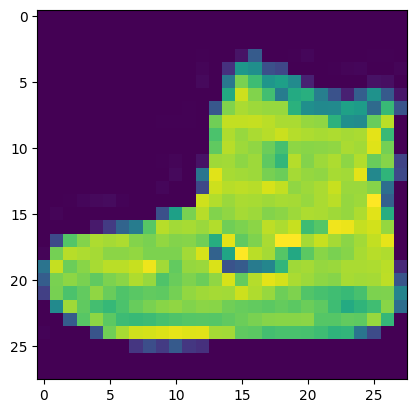

In [9]:
image, label = train_data[0]
print(f"Image shape: {image.shape}")
plt.imshow(image.squeeze())

(np.float64(-0.5), np.float64(27.5), np.float64(27.5), np.float64(-0.5))

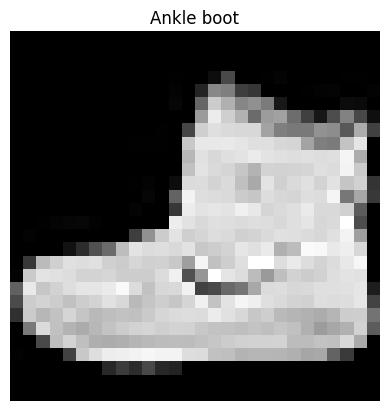

In [10]:
plt.imshow(image.squeeze(), cmap='gray')
plt.title(class_names[label])
plt.axis(False)

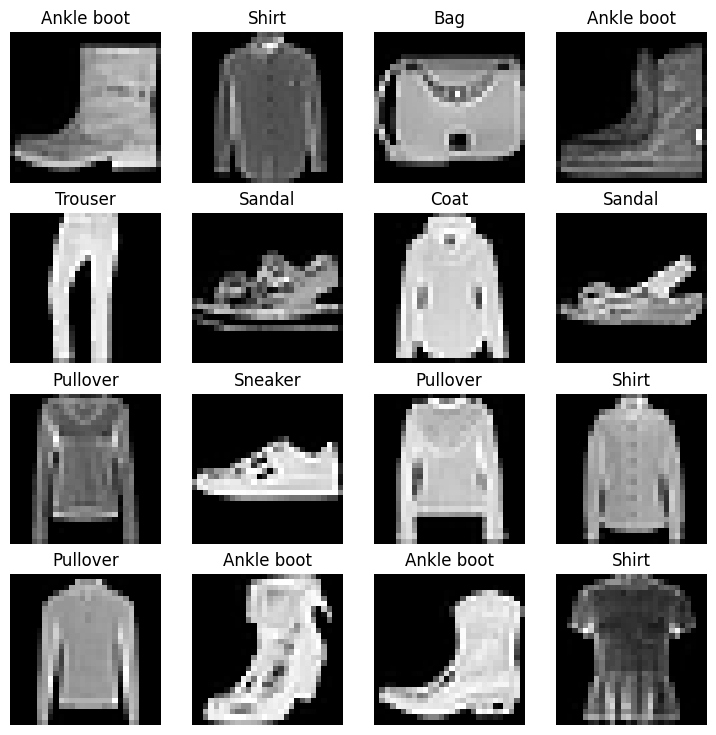

In [11]:
# Plot more images
torch.manual_seed(42)
fig = plt.figure(figsize=(9, 9))
rows, cols = 4, 4
for i in range(1, rows*cols + 1):
    random_idx = torch.randint(0, len(train_data), size=[1]).item()
    img, label = train_data[random_idx]
    fig.add_subplot(rows, cols, i)
    plt.imshow(img.squeeze(), cmap='gray')
    plt.title(class_names[label])
    plt.axis(False)

Do you think these items of clothing could be modeled with pure linear lines? Or do you think we'll need non-linearities?

In [12]:
train_data, test_data

(Dataset FashionMNIST
     Number of datapoints: 60000
     Root location: data
     Split: Train
     StandardTransform
 Transform: ToTensor(),
 Dataset FashionMNIST
     Number of datapoints: 10000
     Root location: data
     Split: Test
     StandardTransform
 Transform: ToTensor())

## 2. Prepare DataLoader

Right now, our data is in the form of PyTorch datasets.

DataLoader turns our dataset into a python iterable.

More specifically, we want to turn our data into batches (or mini-batches).

1. It is more computationally efficient, as in, your computing hardware may not be able to look (store in memory) at 60000 images in one hit. So we break it down to 32 images at a time (batch size of 32).
2. It gives our neural network more chances to update its gradients per epoch.


In [13]:
from torch.utils.data import DataLoader

# Setup the batch size hyperparameter
BATCH_SIZE = 32

# Turn datasets into iterables (batches)
train_dataloader = DataLoader(dataset=train_data,
                              batch_size=BATCH_SIZE,
                              shuffle=True)

test_dataloader = DataLoader(dataset=test_data,
                             batch_size=BATCH_SIZE,
                             shuffle=False)

train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x1f03cffe630>,
 <torch.utils.data.dataloader.DataLoader at 0x1f03d0242f0>)

In [14]:
# Let's checkout what we've created
print(f"DataLoaders: {train_dataloader, test_dataloader}")
print(f"Length of train_dataloader: {len(train_dataloader)} batches of {BATCH_SIZE}...")
print(f"Length of test_dataloader: {len(test_dataloader)} batches of {BATCH_SIZE}...")

DataLoaders: (<torch.utils.data.dataloader.DataLoader object at 0x000001F03CFFE630>, <torch.utils.data.dataloader.DataLoader object at 0x000001F03D0242F0>)
Length of train_dataloader: 1875 batches of 32...
Length of test_dataloader: 313 batches of 32...


In [15]:
# Checkout what's inside the training dataloader
train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

Image size: torch.Size([1, 28, 28])
Label: 8, label size: torch.Size([])


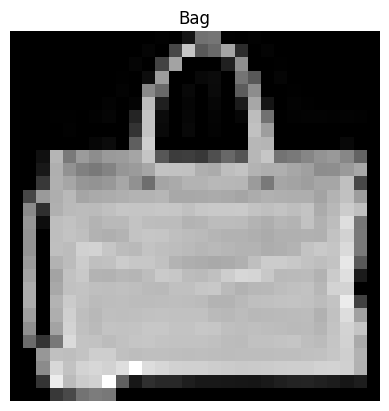

In [16]:
# Show a sample
#torch.manual_seed(42)
random_idx = torch.randint(0, len(train_features_batch), size=[1]).item()
img, label = train_features_batch[random_idx], train_labels_batch[random_idx]
plt.imshow(img.squeeze(), cmap='gray')
plt.title(train_data.classes[label])
plt.axis(False)
print(f"Image size: {img.shape}")
print(f"Label: {label}, label size: {label.shape}")


## 3. Model 0: Build a baseline model

When starting to build a series of machine learning modeling experiments, it's best practice to start with a baseline model.

A baseline model is a simple model you will try and improve upon with subsequent models/experiments.

In other words: start simply and add complexity when necessary.

In [17]:
# Create a flatten layer
flatten_model = nn.Flatten()

# Get a single sample
x = train_features_batch[0]

# Flatten the sample
output = flatten_model(x) # perform forward pass

# Print out what happened
print(f"Shape before flattening: {x.shape} -> [color_channels, height, width]")
print(f"Shape after flattening: {output.shape} -> [color_channels, height*width]")

Shape before flattening: torch.Size([1, 28, 28]) -> [color_channels, height, width]
Shape after flattening: torch.Size([1, 784]) -> [color_channels, height*width]


In [18]:
from torch import nn
class FashionMNISTModelV0(nn.Module):
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=input_shape, out_features=hidden_units),
            nn.Linear(in_features=hidden_units, out_features=output_shape)
        )

    def forward(self, x):
        return self.layer_stack(x)

In [19]:
torch.manual_seed(42)

# Setup model with input parameters
model_0 = FashionMNISTModelV0(
    input_shape=784, # The input shape has to be the the image height*width
    hidden_units=10,
    output_shape=len(class_names) # one for every class
)

model_0.to('cpu')
model_0

FashionMNISTModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [20]:
dummy_x = torch.rand([1, 1, 28, 28]) # batch 1, color channel 1, height 28, width 28
model_0(dummy_x)

tensor([[-0.0315,  0.3171,  0.0531, -0.2525,  0.5959,  0.2112,  0.3233,  0.2694,
         -0.1004,  0.0157]], grad_fn=<AddmmBackward0>)

In [21]:
model_0.state_dict()

OrderedDict([('layer_stack.1.weight',
              tensor([[ 0.0273,  0.0296, -0.0084,  ..., -0.0142,  0.0093,  0.0135],
                      [-0.0188, -0.0354,  0.0187,  ..., -0.0106, -0.0001,  0.0115],
                      [-0.0008,  0.0017,  0.0045,  ..., -0.0127, -0.0188,  0.0059],
                      ...,
                      [-0.0116,  0.0273, -0.0344,  ...,  0.0176,  0.0283, -0.0011],
                      [-0.0230,  0.0257,  0.0291,  ..., -0.0187, -0.0087,  0.0001],
                      [ 0.0176, -0.0147,  0.0053,  ..., -0.0336, -0.0221,  0.0205]])),
             ('layer_stack.1.bias',
              tensor([-0.0093,  0.0283, -0.0033,  0.0255,  0.0017,  0.0037, -0.0302, -0.0123,
                       0.0018,  0.0163])),
             ('layer_stack.2.weight',
              tensor([[ 0.0614, -0.0687,  0.0021,  0.2718,  0.2109,  0.1079, -0.2279, -0.1063,
                        0.2019,  0.2847],
                      [-0.1495,  0.1344, -0.0740,  0.2006, -0.0475, -0.2514, -0.

### 3.1 Setup loss, optimizer and evaluation metrics

* Loss function - since we're working with multi-class, our loss function will be `nn.CrossEntropyLoss()`
* Optimizer - our optimizer `torch.optim.SGD()` (stochastic gradient descent)
* Evaluation metric - since we're working on classification problem, let's use accuracy as our evaluation metric

In [22]:
import requests
from pathlib import Path

# Download helper functions from learn pytorch repo
if Path('helper_functions.py').is_file():
    print('helper_functions.py already exists, skipping download...')
else:
    print('Downloading helper_functions.py')
    request = requests.get('https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py')
    with open('helper_functions.py', 'wb') as f:
        f.write(request.content)


helper_functions.py already exists, skipping download...


In [23]:
# import accuracy metric
from helper_functions import accuracy_fn

# Setup loss functions and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.1)

### 3.2 Creating a function to time our experiments

Machine learning is very experimental.

Two of the main things you'll often want to track are:
1. Model's performance (loss and accuracy values)
2. How fast it runs

In [24]:
from timeit import default_timer as timer
def print_train_time(start: float,
                     end: float,
                     device: torch.device=None):
    '''
    Prints difference between start and end time.
    '''
    total_time = end-start
    print(f"Train time on {device}: {total_time:.3f} seconds")
    return total_time

In [25]:
start_time = timer()
# code
end_time = timer()
print_train_time(start_time, end_time)

Train time on None: 0.000 seconds


2.269999822601676e-05

### 3.3 Creating a training loop and training a model on batches of data

1. Loop through epochs.
2. Loop through training batches, perform training steps, calculate the train loss *per batch*.
3. Loop through testing batches, perform testing steps, calculate the test loss *per batch*.
4. Print out what's happening
5. Time it all

In [26]:
# Import tqdm
%pip install tqdm
from tqdm.auto import tqdm

# Set the seed and start the timer
torch.manual_seed(42)
train_time_start_on_cpu = timer()

# Set the number of epochs (we'll keep this small for faster training time)
epochs = 3

# Create training and test loop
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n-------")

    # Training
    train_loss = 0
    # Add a loop to loop through the training batches
    for batch, (X, y) in enumerate(train_dataloader):
        model_0.train()
        # 1. Forward pass
        y_pred = model_0(X)

        # 2. Calculate the loss
        loss = loss_fn(y_pred, y)
        train_loss += loss # accumulate train loss

        # 3. Optimizer zero grad
        optimizer.zero_grad()

        # 4. Loss backward
        loss.backward()

        # 5. Optimizer step
        optimizer.step()

        # Print out what's happening
        if batch % 400 == 0:
            print(f"Looked at {batch * len(X)}/{len(train_dataloader.dataset)} samples")

    # Divide total train loss by length of train dataloader
    train_loss /= len(train_dataloader)

    # Testing loop
    test_loss, test_acc = 0, 0
    model_0.eval()
    with torch.inference_mode():
        for X_test, y_test in test_dataloader:
            # 1. Forward pass
            test_pred = model_0(X_test)

            # 2. Calculate loss (accumlatively)
            test_loss += loss_fn(test_pred, y_test)

            # 3 Calculate accuarcy
            test_acc += accuracy_fn(y_true=y_test, y_pred=test_pred.argmax(dim=1))

        # Calculate the test loss average per batch
        test_loss /= len(test_dataloader)

        # Calculate the test acc average per batch
        test_acc /= len(test_dataloader)

    # Print out what's happening
    print(f"\nTrain loss: {train_loss:.4f} | Test loss: {test_loss:.4f}, Test acc: {test_acc:.4f}")

# Calculate the training time
train_time_end_on_cpu = timer()

total_train_time_model_0 = print_train_time(train_time_start_on_cpu, train_time_end_on_cpu, device=str(next(model_0.parameters()).device))

c:\Users\justi\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Note: you may need to restart the kernel to use updated packages.


  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
-------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples


 33%|███▎      | 1/3 [00:09<00:18,  9.36s/it]


Train loss: 0.5904 | Test loss: 0.5095, Test acc: 82.0387
Epoch: 1
-------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples


 67%|██████▋   | 2/3 [00:18<00:09,  9.52s/it]


Train loss: 0.4763 | Test loss: 0.4799, Test acc: 83.1969
Epoch: 2
-------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples


100%|██████████| 3/3 [00:28<00:00,  9.46s/it]


Train loss: 0.4550 | Test loss: 0.4766, Test acc: 83.4265
Train time on cpu: 28.391 seconds


### 4. Make predictions and get Model 0 results

In [27]:
torch.manual_seed(42)

def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn) -> dict:
    """
    Returns a dictionary containing the results of model predicting on data_loader
    """
    loss, acc = 0, 0
    model.eval()
    with torch.inference_mode():
        for X, y in tqdm(data_loader):
            # Make predictions
            y_pred = model(X)

            # Accumulate the lsos and acc values per batch
            loss += loss_fn(y_pred, y)
            acc += accuracy_fn(y_true=y, y_pred=y_pred.argmax(dim=1))

        # Scale the loss and acc to find the average loss/acc per batch
        loss /= len(data_loader)
        acc /= len(data_loader)

    return {"model_name": model.__class__.__name__, # only works when model was created with a class
            "model_loss": loss.item(),
            "model_acc": acc}

# Calculate model 0 results on test dataset
model_0_results = eval_model(model=model_0,
                             data_loader=test_dataloader,
                             loss_fn=loss_fn,
                             accuracy_fn=accuracy_fn)
model_0_results

100%|██████████| 313/313 [00:01<00:00, 275.76it/s]


{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.47663894295692444,
 'model_acc': 83.42651757188499}

### 5. Setup device agnostic-code (for using a GPU if there is one)

In [28]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

#### My attempt at making the model and everything by myself

100%|██████████| 4/4 [00:00<00:00, 115.96it/s]


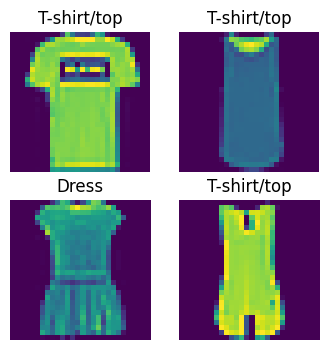

In [29]:
# Get data
train_data = datasets.FashionMNIST(
    root='data',
    train=True,
    transform=ToTensor(),
    target_transform=None
)

test_data = datasets.FashionMNIST(
    root='data',
    train=False,
    transform=torchvision.transforms.ToTensor(),
    target_transform=None
)

rows = 2
cols = 2
fig = plt.figure(figsize=(4, 4))

for i in tqdm(range(1, rows*cols+1)):
    fig.add_subplot(rows, cols, i)

    img, label = train_data[i]
    plt.title(train_data.classes[label])
    
    plt.imshow(img.squeeze())
    plt.axis(False)

train_dataloader = DataLoader(dataset=train_data,
                              shuffle=True,
                              batch_size=32)

test_dataloader = DataLoader(dataset=test_data,
                             batch_size=32,
                             shuffle=False)




In [30]:
class FashionMNISTModelV1(nn.Module):
    def __init__(self, n_in, n_out, n_hidden):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=n_in, out_features=n_hidden),
            nn.ReLU(),
            nn.Linear(in_features=n_hidden, out_features=n_hidden),
            nn.ReLU(),
            nn.Linear(in_features=n_hidden, out_features=n_hidden),
            nn.ReLU(),
            nn.Linear(in_features=n_hidden, out_features=n_hidden),
            nn.ReLU(),
            nn.Linear(in_features=n_hidden, out_features=n_out),
        )
    
    def forward(self, x):
        return self.layer_stack(x)
    

image, _ = train_data[0]
_, height, width = image.shape

# Initialize model, loss function and optimizer
model_1 = FashionMNISTModelV1(n_in = height*width, n_out=len(train_data.classes), n_hidden=32)
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_1.parameters(), lr=0.1)

torch.manual_seed(77)
start_time = timer()

epochs = 4

for epoch in tqdm(range(epochs)):
    model_1.train()

    for batch, (X_train, y_train) in enumerate(train_dataloader):
        y_logits = model_1(X_train)
        loss = loss_fn(y_logits, y_train)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Print out what's happening
        # print(f"Looked at {batch}/{len(train_dataloader)} batches")

    test_acc = 0
    model_1.eval()
    with torch.inference_mode():
        for batch, (X_test, y_test) in enumerate(test_dataloader):
            test_logits = model_1(X_test)
            test_acc += accuracy_fn(y_true=y_test, y_pred=torch.argmax(test_logits, dim=1))

        test_acc /= len(test_dataloader)

    print(f"Test Accuracy: {test_acc}")

end_time = timer()

print_train_time(start=start_time, end=end_time, device=device)
            


 25%|██▌       | 1/4 [00:13<00:40, 13.55s/it]

Test Accuracy: 80.41134185303514


 50%|█████     | 2/4 [00:25<00:24, 12.32s/it]

Test Accuracy: 84.20527156549521


 75%|███████▌  | 3/4 [00:35<00:11, 11.59s/it]

Test Accuracy: 84.26517571884985


100%|██████████| 4/4 [00:46<00:00, 11.62s/it]

Test Accuracy: 83.33666134185303
Train time on cuda: 46.471 seconds


46.47104040000704

### 6. Model 1: Building a better model with non-linearity

Create a model with non-linear and linear layers

In [31]:
# Create a model with non-linear and linear layers
class FashionMNISTModelV2(nn.Module):
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=input_shape, out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units, out_features=output_shape),
            nn.ReLU()
        )
    
    def forward(self, x: torch.Tensor):
        return self.layer_stack(x)

In [32]:
model_2 = FashionMNISTModelV2(input_shape=784, # this is the output of the flatten after our 28*28 image goes in
                              hidden_units=10,
                              output_shape=len(class_names)).to(device)

### 6.1 Setup loss, optimizer and evaluation metrics

In [33]:
from helper_functions import accuracy_fn
loss_fn = nn.CrossEntropyLoss() # measure how wrong our model is
optimizer = torch.optim.SGD(params=model_2.parameters(), lr=0.1) # tries to update our model's parameters to reduce the loss



### 6.2 Functionizing training and evaluation/testing loops

Let's create a function for:
* training loop -> `train_step()`
* testing loop -> `test_step()`

In [34]:
def train_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               accuracy_fn,
               device: torch.device = device):
    """
    Performs a training with model trying to learn on data_loader.
    """
    train_loss, train_acc = 0, 0
    model.train()
    # Add a loop to loop through the training batches
    for batch, (X, y) in enumerate(data_loader):
        # Put data on target device
        X, y = X.to(device), y.to(device)
    
        # 1. Forward pass
        y_pred = model(X)

        # 2. Calculate the loss and accuracy per batch
        loss = loss_fn(y_pred, y)
        train_loss += loss # accumulate train loss
        train_acc += accuracy_fn(y_true=y, y_pred=y_pred.argmax(dim=1)) # go from logits to predcition labels

        # 3. Optimizer zero grad
        optimizer.zero_grad()

        # 4. Loss backward
        loss.backward()

        # 5. Optimizer step
        optimizer.step()


    # Divide total train loss and accuracy by length of train dataloader
    train_loss /= len(data_loader)
    train_acc /= len(data_loader)
    print(f"Train loss: {train_loss:.5f} | Train acc: {train_acc:.2f}%")

def test_step(model: torch.nn.Module,
              data_loader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module,
              accuracy_fn,
              device: torch.device = device):
    """
    Performs a testing loop step on model going over data_loader.
    """
    # Testing loop
    test_loss, test_acc = 0, 0
    model.eval()
    with torch.inference_mode():
        for X_test, y_test in data_loader:
            X_test, y_test = X_test.to(device), y_test.to(device)
            # 1. Forward pass
            test_pred = model(X_test)

            # 2. Calculate loss (accumlatively)
            test_loss += loss_fn(test_pred, y_test)

            # 3 Calculate accuarcy
            test_acc += accuracy_fn(y_true=y_test, y_pred=test_pred.argmax(dim=1)) # raw logits -> prediction labels

        # Calculate the test loss average per batch
        test_loss /= len(data_loader)

        # Calculate the test acc average per batch
        test_acc /= len(data_loader)

    # Print out what's happening
    print(f"Test loss: {test_loss:.5f} | Test acc: {test_acc:.2f}%")


In [35]:
# Training and testing our model
start_time = timer()
epochs = 3
device = 'cuda' if torch.cuda.is_available() else 'cpu'

for epoch in tqdm(range(epochs)):
    train_step(model=model_2,
               data_loader=train_dataloader,
               loss_fn=loss_fn,
               optimizer=optimizer,
               accuracy_fn=accuracy_fn,
               device=device)
    
    test_step(model=model_2,
               data_loader=test_dataloader,
               loss_fn=loss_fn,
               accuracy_fn=accuracy_fn,
               device=device)
    
end_time = timer()
total_train_time_model_2 = print_train_time(start=start_time, end=end_time, device=device)
total_train_time_model_2

  0%|          | 0/3 [00:00<?, ?it/s]

Train loss: 0.69206 | Train acc: 76.65%


 33%|███▎      | 1/3 [00:23<00:47, 23.91s/it]

Test loss: 0.52792 | Test acc: 81.39%
Train loss: 0.49743 | Train acc: 82.36%


 67%|██████▋   | 2/3 [00:39<00:18, 18.88s/it]

Test loss: 0.49487 | Test acc: 82.59%
Train loss: 0.46664 | Train acc: 83.41%


100%|██████████| 3/3 [00:54<00:00, 18.12s/it]

Test loss: 0.49278 | Test acc: 82.92%
Train time on cuda: 54.388 seconds


54.388247499999125

In [36]:
print(total_train_time_model_0)
print(total_train_time_model_2)


28.391442399995867
54.388247499999125


> **Note:** Sometimes, depending on your data/hardward you might find that your model trains faster on CPU than GPU.
>
> Why is this?
>
> 1. It could be that the overhead for copying data/model to and from the CPU outweighs the compute benefits offered by the GPU.
> 2. The hardward you're using has a better CPU in terms compute capability than the GPU.

In [37]:
# Get model 1 results dictionary
def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn,
               device=device) -> dict:
    """
    Returns a dictionary containing the results of model predicting on data_loader
    """
    loss, acc = 0, 0
    model.eval()
    with torch.inference_mode():
        for X, y in tqdm(data_loader):
            X, y = X.to(device), y.to(device)
            # Make predictions
            y_pred = model(X)

            # Accumulate the lsos and acc values per batch
            loss += loss_fn(y_pred, y)
            acc += accuracy_fn(y_true=y, y_pred=y_pred.argmax(dim=1))

        # Scale the loss and acc to find the average loss/acc per batch
        loss /= len(data_loader)
        acc /= len(data_loader)

    return {"model_name": model.__class__.__name__, # only works when model was created with a class
            "model_loss": loss.item(),
            "model_acc": acc}

model_2_results = eval_model(model=model_2,
                             data_loader=test_dataloader,
                             loss_fn=loss_fn,
                             accuracy_fn=accuracy_fn,
                             device=device)

100%|██████████| 313/313 [00:01<00:00, 181.64it/s]


In [38]:
model_0_results, model_2_results

({'model_name': 'FashionMNISTModelV0',
  'model_loss': 0.47663894295692444,
  'model_acc': 83.42651757188499},
 {'model_name': 'FashionMNISTModelV2',
  'model_loss': 0.4927782416343689,
  'model_acc': 82.9173322683706})

## Model 3: Building a Convolutional Neural Network (CNN)

CNN's are also known ConvNets.

CNN's are known for their capabilities to find patterns in visual data

This website is good to visualize how CNN's look - https://poloclub.github.io/cnn-explainer/

In [39]:
# Create a convolutional neural network
class FashionMNISTModelV3(nn.Module):
    """
    Model architecture that replicates the TinyVGG model from the CNN explainer website
    """
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
        super().__init__()
        self.conv_block_1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape,
                        out_channels=hidden_units,
                        kernel_size=3,
                        stride=1,
                        padding=1), # values we can set ourselves in our NN's are called hyperparameters
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)          
        )
        self.conv_block_2 = nn.Sequential(
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=hidden_units*7*7, # there's a trick to calculating this
                      out_features=output_shape)
        )

    def forward(self, x):
        x = self.conv_block_1(x)
        # print(f"Output shape of conv_block_1: {x.shape}")
        x = self.conv_block_2(x)
        # print(f"Output shape of conv_block_2: {x.shape}")
        x = self.classifier(x)
        # print(f"Output shape of classifier: {x.shape}")
        return x


In [40]:
torch.manual_seed(42)
model_3 = FashionMNISTModelV3(input_shape=1, # Our input shape is one because we have 1 color channel
                              hidden_units=10,
                              output_shape=len(class_names)).to(device)

In [41]:
rand_image_tensor = torch.randn(size=(32, 1, 28, 28)).to(device)
model_3(rand_image_tensor)

tensor([[ 0.0366, -0.0940,  0.0686, -0.0485,  0.0068,  0.0290,  0.0132,  0.0084,
         -0.0030, -0.0185],
        [ 0.0358, -0.0907,  0.0761, -0.0497,  0.0093,  0.0326,  0.0156, -0.0088,
         -0.0064, -0.0145],
        [ 0.0382, -0.1028,  0.0712, -0.0495,  0.0203,  0.0429,  0.0121,  0.0011,
          0.0042, -0.0220],
        [ 0.0500, -0.0924,  0.0806, -0.0513,  0.0048,  0.0301,  0.0071, -0.0045,
         -0.0129, -0.0192],
        [ 0.0293, -0.0892,  0.0825, -0.0402,  0.0146,  0.0193,  0.0145, -0.0059,
         -0.0084, -0.0123],
        [ 0.0394, -0.0979,  0.0863, -0.0436,  0.0084,  0.0092,  0.0103, -0.0094,
         -0.0225, -0.0086],
        [ 0.0467, -0.0919,  0.0747, -0.0380,  0.0306,  0.0275,  0.0073, -0.0113,
         -0.0018, -0.0296],
        [ 0.0445, -0.0905,  0.0862, -0.0400,  0.0157,  0.0311,  0.0199,  0.0082,
         -0.0191, -0.0138],
        [ 0.0423, -0.1045,  0.0787, -0.0463,  0.0038,  0.0248,  0.0077,  0.0058,
          0.0042, -0.0346],
        [ 0.0305, -

### 7.1 Stepping through `nn.Conv2d()`

In [42]:
torch.manual_seed(42)

images = torch.rand(size=(32, 3, 64, 64))
test_image = images[0]

print(f"Image batch shape: {images.shape}")
print(f"Single image shape: {test_image.shape}")
print(f"Test image:\n {test_image}")

Image batch shape: torch.Size([32, 3, 64, 64])
Single image shape: torch.Size([3, 64, 64])
Test image:
 tensor([[[0.8823, 0.9150, 0.3829,  ..., 0.1587, 0.6542, 0.3278],
         [0.6532, 0.3958, 0.9147,  ..., 0.2083, 0.3289, 0.1054],
         [0.9192, 0.4008, 0.9302,  ..., 0.5535, 0.4117, 0.3510],
         ...,
         [0.1457, 0.1499, 0.3298,  ..., 0.9624, 0.6400, 0.7409],
         [0.1709, 0.5797, 0.6340,  ..., 0.6885, 0.2405, 0.5956],
         [0.9199, 0.1247, 0.3573,  ..., 0.6752, 0.2058, 0.5027]],

        [[0.1458, 0.9024, 0.9217,  ..., 0.1868, 0.6352, 0.8431],
         [0.9549, 0.4435, 0.6924,  ..., 0.1168, 0.7160, 0.5462],
         [0.1616, 0.1054, 0.8614,  ..., 0.4531, 0.4736, 0.9448],
         ...,
         [0.4309, 0.3986, 0.1907,  ..., 0.9444, 0.2848, 0.3776],
         [0.7948, 0.6855, 0.1009,  ..., 0.6147, 0.7747, 0.2323],
         [0.5840, 0.9795, 0.3277,  ..., 0.3549, 0.1263, 0.1280]],

        [[0.5027, 0.4195, 0.8893,  ..., 0.3084, 0.1567, 0.7860],
         [0.7310, 0

In [43]:
# Create a single conv2d layer
conv_layer = nn.Conv2d(in_channels=3,
                       out_channels=10,
                       kernel_size=3,
                       stride=1,
                       padding=1)

# Pass the data through the convolutional layer
conv_output = conv_layer(test_image)
conv_output.shape

torch.Size([10, 64, 64])

### 7.2 Stepping through `nn.MaxPool2d()`

In [44]:
# Print out original image shape
print(f"Test image original shape: {test_image.shape}")
print(f"Test image with unsqueezed dimension: {test_image.unsqueeze(0).shape}")

# Create a smaple nn.MaxPool2d layer
max_pool_layer = nn.MaxPool2d(kernel_size=2)

# Pass data through just the conv_layer
test_image_through_conv = conv_layer(test_image.unsqueeze(0))
print(f"Shape after going through conv_layer(): {test_image_through_conv.shape}")

# Pass data through the max pool layer
test_image_through_conv_and_max_pool = max_pool_layer(test_image_through_conv)
print(f"Shape after going through conv_layer() and max_pool_layer(): {test_image_through_conv_and_max_pool.shape}")

Test image original shape: torch.Size([3, 64, 64])
Test image with unsqueezed dimension: torch.Size([1, 3, 64, 64])
Shape after going through conv_layer(): torch.Size([1, 10, 64, 64])
Shape after going through conv_layer() and max_pool_layer(): torch.Size([1, 10, 32, 32])


In [45]:
# Print out original image shape
print(f"Test image original shape: {images.shape}")
print(f"Test image with unsqueezed dimension: {images.shape}")

# Create a smaple nn.MaxPool2d layer
max_pool_layer = nn.MaxPool2d(kernel_size=2)

# Pass data through just the conv_layer
images_through_conv = conv_layer(images)
print(f"Shape after going through conv_layer(): {images_through_conv.shape}")

# Pass data through the max pool layer
images_through_conv_and_max_pool = max_pool_layer(images_through_conv)
print(f"Shape after going through conv_layer() and max_pool_layer(): {images_through_conv_and_max_pool.shape}")

Test image original shape: torch.Size([32, 3, 64, 64])
Test image with unsqueezed dimension: torch.Size([32, 3, 64, 64])
Shape after going through conv_layer(): torch.Size([32, 10, 64, 64])
Shape after going through conv_layer() and max_pool_layer(): torch.Size([32, 10, 32, 32])


In [46]:
torch.manual_seed(42)
# Create a random tensor with a similar number of dimensions to our images
random_tensor = torch.randn(size=(1, 1, 2, 2))
print(f"Random tensor:\n{random_tensor}")
print(f"Random tensor shape:\n{random_tensor.shape}")
# Create a max pool layer
max_pool_layer = nn.MaxPool2d(kernel_size=2)

# Pass the random tensor through the max pool layer
max_pool_tensor = max_pool_layer(random_tensor)

print(f"\nMax pool tensor:\n {max_pool_tensor}")
print(f"Max pool tensor shape: {max_pool_tensor.shape}")


Random tensor:
tensor([[[[0.3367, 0.1288],
          [0.2345, 0.2303]]]])
Random tensor shape:
torch.Size([1, 1, 2, 2])

Max pool tensor:
 tensor([[[[0.3367]]]])
Max pool tensor shape: torch.Size([1, 1, 1, 1])


### 7.3 Setup a loss function and optimizer for `model_3`

In [49]:
# Setup loss functin/eval metrics/optimizer
from helper_functions import accuracy_fn
model_3 = FashionMNISTModelV3(input_shape=1, # Our input shape is one because we have 1 color channel
                              hidden_units=10,
                              output_shape=len(class_names)).to(device)
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_3.parameters(), lr=0.1)

### 7.4 Training and testing `model_3` using our training and test functions

In [50]:
torch.manual_seed(77)

# Measure the time
start_time = timer()
device = 'cuda' if torch.cuda.is_available() else 'cpu'
# Train and test model
epochs = 3
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n--------")
    train_step(model=model_3,
               data_loader=train_dataloader,
               loss_fn=loss_fn,
               optimizer=optimizer,
               accuracy_fn=accuracy_fn,
               device=device)
    
    test_step(model=model_3,
              data_loader=test_dataloader,
              loss_fn=loss_fn,
              accuracy_fn=accuracy_fn,
              device=device)
    

end_time = timer()

total_train_time_model_3 = print_train_time(start=start_time,
                                            end=end_time,
                                            device=device)


  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
--------
Train loss: 0.56783 | Train acc: 79.43%


 33%|███▎      | 1/3 [00:19<00:38, 19.17s/it]

Test loss: 0.40062 | Test acc: 85.07%
Epoch: 1
--------
Train loss: 0.35167 | Train acc: 87.29%


 67%|██████▋   | 2/3 [00:43<00:22, 22.07s/it]

Test loss: 0.34124 | Test acc: 87.67%
Epoch: 2
--------
Train loss: 0.31600 | Train acc: 88.58%


100%|██████████| 3/3 [01:03<00:00, 21.27s/it]

Test loss: 0.32275 | Test acc: 88.23%
Train time on cuda: 63.819 seconds


In [51]:
# Get model_3 results
model_3_results = eval_model(
    model=model_3,
    data_loader=test_dataloader,
    loss_fn=loss_fn,
    accuracy_fn=accuracy_fn,
    device=device
)
model_3_results

100%|██████████| 313/313 [00:03<00:00, 85.02it/s] 


{'model_name': 'FashionMNISTModelV3',
 'model_loss': 0.32275164127349854,
 'model_acc': 88.22883386581469}

### 8. Compare model results and training time

In [53]:
import pandas as pd
compare_results = pd.DataFrame([model_0_results, model_2_results, model_3_results])
compare_results.head()

,model_name,model_loss,model_acc
0,FashionMNISTModelV0,0.476639,83.426518
1,FashionMNISTModelV2,0.492778,82.917332
2,FashionMNISTModelV3,0.322752,88.228834


In [54]:
# Add training time to results comparison
compare_results['Train Time'] = [total_train_time_model_0,
                                 total_train_time_model_2,
                                 total_train_time_model_3]
compare_results.head()

,model_name,model_loss,model_acc,Train Time
0,FashionMNISTModelV0,0.476639,83.426518,28.391442
1,FashionMNISTModelV2,0.492778,82.917332,54.388247
2,FashionMNISTModelV3,0.322752,88.228834,63.819113


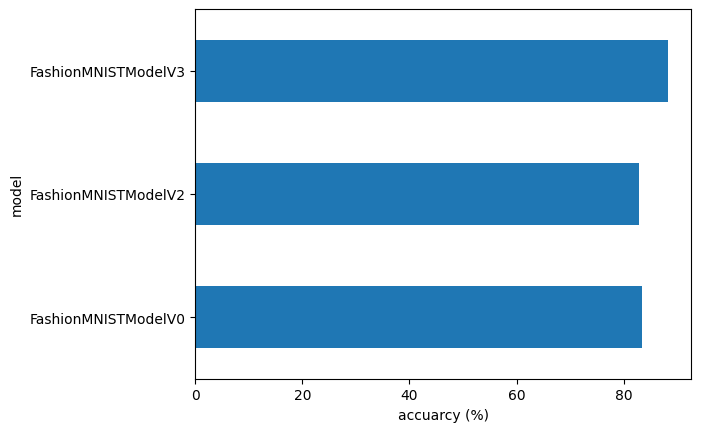

In [59]:
# Visualize our model results
compare_results.set_index('model_name')['model_acc'].plot(kind='barh')
plt.xlabel('accuarcy (%)')
plt.ylabel('model');

### 9. Make and evaluate random predictions with best model

In [60]:
def make_predictions(model: torch.nn.Module,
                     data: list,
                     device: torch.device = device):
    pred_probs = []
    model.to(device)
    model.eval()
    with torch.inference_mode():
        for sample in data:
            # Prepare the sample (add a batch dimension and pass to target device)
            sample = torch.unsqueeze(sample, dim=0).to(device)

            # Forward pass (model outputs raw logits)
            pred_logit = model(sample)

            # Get prediction probability (logit -> prediction)
            pred_prob = torch.softmax(pred_logit.squeeze(), dim=0)

            # Get pred_prob off the GPU for further calculation
            pred_probs.append(pred_prob.cpu())

    # Stack the pred_probs to turn list into a tensor
    return torch.stack(pred_probs)


In [73]:
import random
random.seed(77)
test_samples = []
test_labels = []
for sample, label in random.sample(list(test_data), k=25):
    test_samples.append(sample)
    test_labels.append(label)

# View the first sample shape
test_samples[0].shape

torch.Size([1, 28, 28])

Text(0.5, 1.0, 'Shirt')

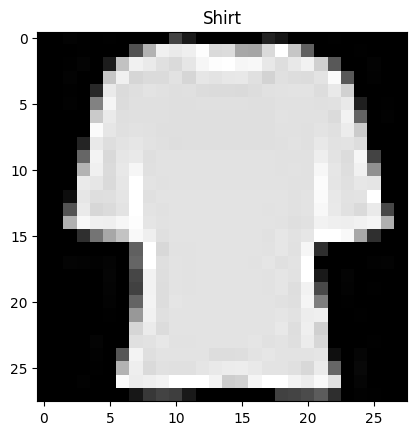

In [74]:
plt.imshow(test_samples[0].squeeze(), cmap='gray')
plt.title(class_names[test_labels[0]])

In [75]:
# Make predictions
pred_probs = make_predictions(model=model_3,
                              data=test_samples)

# View first two prediction probabilities
pred_probs[:2]

tensor([[4.2199e-01, 3.7737e-05, 2.3492e-02, 2.9376e-03, 2.7572e-04, 3.9539e-06,
         5.5086e-01, 1.7451e-06, 4.0577e-04, 6.0385e-07],
        [2.8127e-05, 2.9788e-08, 1.5325e-07, 1.9724e-07, 3.2355e-07, 6.7534e-06,
         3.3103e-06, 6.3461e-07, 9.9996e-01, 3.2713e-06]])

In [76]:
# Convert prediction probabilities to labels
pred_classes = pred_probs.argmax(dim=1)
pred_classes

tensor([6, 8, 0, 6, 2, 1, 2, 5, 6, 7, 5, 7, 4, 9, 8, 0, 8, 0, 8, 9, 8, 7, 5, 4,
        6])

In [77]:
test_labels

[6, 8, 6, 3, 2, 1, 4, 5, 6, 9, 5, 7, 6, 9, 8, 0, 8, 0, 8, 9, 8, 7, 5, 4, 6]

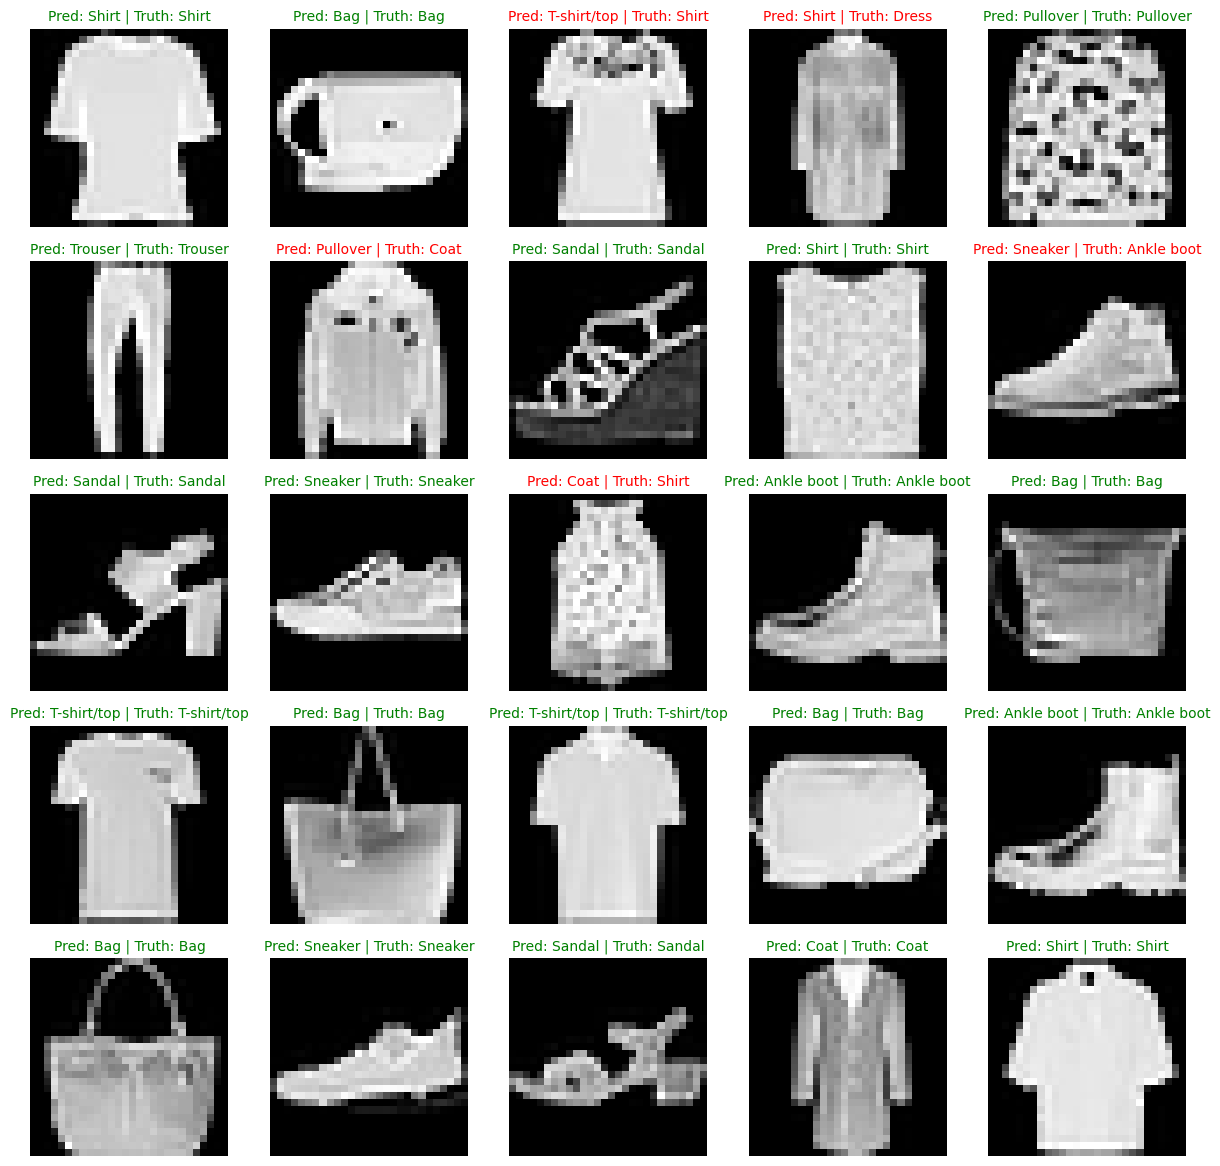

In [81]:
# Plot predictions
plt.figure(figsize=(12,12))
nrows = 5
ncols = 5

for i, sample in enumerate(test_samples):
    # Create subplot
    plt.subplot(nrows, ncols, i+1)

    # Plot the target image
    plt.imshow(sample.squeeze(), cmap='gray')
    
    # Find the prediction (in text form)
    pred_label = class_names[pred_classes[i]]

    # Get the truth label
    truth_label = class_names[test_labels[i]]

    # Create a title for the plot
    title_text = f"Pred: {pred_label} | Truth: {truth_label}"

    # Check for equality between pred and truth and change color of title text
    if pred_label == truth_label:
        plt.title(title_text, fontsize=10, c='g') # green text if prediction same as truth
    else:
        plt.title(title_text, fontsize=10, c='r')

    plt.tight_layout()
    plt.axis(False);

### 10. Making a confusion matrix for further prediction evaluation

A confusion matrix is a fantasic way of evaluting your classification models visually

1. Make predictions with our trained model on the test dataset
2. Make a confusion matrix `torchmetrics.ConfusionMatrix`
3. Plot the confusion matrix using `mlxtend.plotting.plot_confusion_matrix()`

In [83]:
%pip install mlxtend
import mlxtend
from tqdm.auto import tqdm

   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   -------------------------------------- - 1.3/1.4 MB 11.2 MB/s eta 0:00:01
   ---------------------------------------- 1.4/1.4 MB 11.6 MB/s  0:00:00
Note: you may need to restart the kernel to use updated packages.


In [89]:
# 1. Make predictions with trained model
y_preds = []
model_3.eval()
with torch.inference_mode():
    for X, y in tqdm(test_dataloader, desc='Making predictions...'):
        # Send the data and targets to target device
        X, y = X.to(device), y.to(device)
        # Do the forward pass
        y_logit = model_3(X)
        # Turn predictions from logits -> prediction probabilities -> prediction labels
        y_pred = torch.softmax(y_logit.squeeze(), dim=0).argmax(dim=1)
        #Put prediction on CPU for evaluation
        y_preds.append(y_pred.cpu())

    # Concatenate list of predictions into a tensor
    # print(y_preds)
    y_pred_tensor = torch.cat(y_preds)
    print(y_pred_tensor)
    print(len(y_pred_tensor))

Making predictions...: 100%|██████████| 313/313 [00:03<00:00, 83.60it/s] 

tensor([9, 2, 1,  ..., 8, 1, 7])
10000


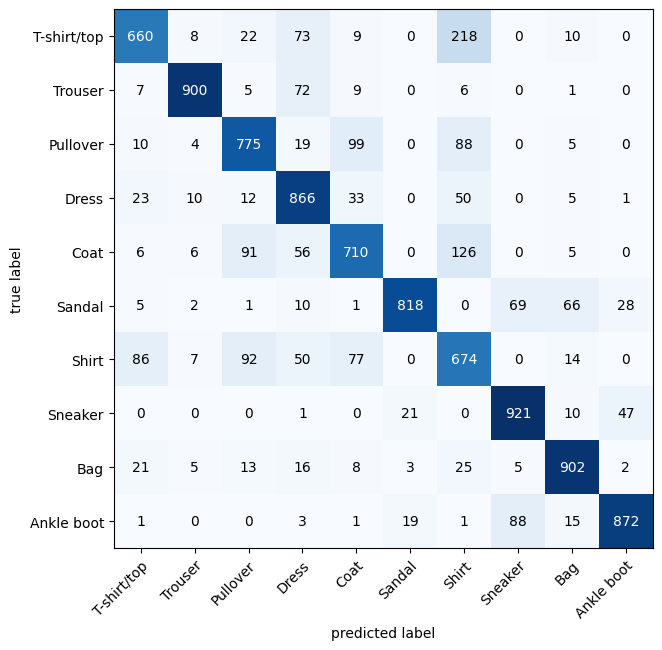

In [101]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

# 2. Setup confusion matrix instance and compare predictions to targets
confmat = ConfusionMatrix(task='multiclass',num_classes=len(class_names))
confmat_tensor = confmat(preds=y_pred_tensor,
                         target=test_data.targets)

# 3. Plot the confusion matrix
fig, ax = plot_confusion_matrix(
    conf_mat=confmat_tensor.numpy(), # matplotlib likes working with numpy
    class_names=class_names,
    figsize=(10, 7)
)